# nmi | spring 2024
## homework 06 | least squares
## your name here


### q1 (10 pts) least squares solution

form the normal equations and compute the least squares solution and 2-norm error for inconsistent system below. <b><font color=orange>if you code your answers, also display the normal equations.</font></b>
</br></br>

$$
\begin{bmatrix}
  3 & -1 & 2 \\
  4 & 1 & 0 \\
  -3 & 2 & 1 \\
  1 & 1 & 5 \\
  -2 & 0 & 3
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
=
\begin{bmatrix}
  10 \\ 10 \\ -5 \\ 15 \\ 0
\end{bmatrix}
$$
</br>


##### answer


$\bar{x} = [2.5246, 0.6616, 2.0934], ||e||_2 = 2.4135$
</br>


In [ ]:
import numpy as np

def main():
  a = np.array([[3,-1,2],[4,1,0],[-3,2,1],[1,1,5],[-2,0,3]])
  b = np.array([10,10,-5,15,0])
  ata = a.T @ a
  atb = a.T @ b
  x = np.linalg.solve(ata,atb)
  print(f"\nsoln:\n{x}")
  r = a @ x - b
  print(f"\n2-norm: {np.linalg.norm(r)}")

  if True:
    print("\n",ata)
    print("\n",atb)
    print(f"x2 = {(595-203*3734/1788)/257}")
    print(f"x3 = {37340/17880}")

if __name__ == "__main__":
  main()



soln:
[2.5246085  0.66163311 2.09340045]

2-norm: 2.4134920906413533

 [[39 -4  2]
 [-4  7  5]
 [ 2  5 39]]

 [100   5  90]
x2 = 0.6656090321120482
x3 = 2.088366890380313


### q2 (10 pts) models

fit data below to periodic model $y = F_3(t) = c_1 + c_2\text{ }cos\text{ }2\pi t + c_3\text{ }sin\text{ }2\pi t$. calculate 2-norm error and RMSE.
</br></br>

|t|y|
|-|-|
0.00|1
0.25|3
0.50|2
0.75|0


##### answer


$y=\frac{3}{2} - \frac{1}{2}\text{ }cos\text{ }2\pi t + \frac{3}{2}\text{ }sin\text{ }2\pi t, ||e||_2 = 0, RMSE = 0$.
</br>


###### code



LHS:
[[ 4.00000000e+00 -1.83697020e-16  2.22044605e-16]
 [-1.83697020e-16  2.00000000e+00  1.22464680e-16]
 [ 2.22044605e-16  1.22464680e-16  2.00000000e+00]]

RHS:  [ 6. -1.  3.]

[c]:  [ 1.5 -0.5  1.5]

SE: 0.0
RMSE: 0.0



,t,y,model,error
0,0.0,1.0,1.0,0.0000
1,6.0,3.0,3.0,0.0000
2,12.0,2.0,2.0,0.0000
3,18.0,0.0,0.0,0.0000


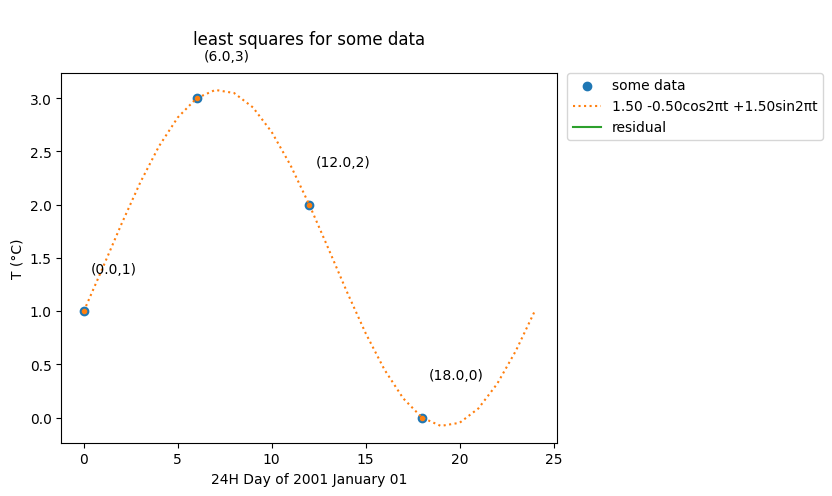

In [ ]:
# example 06: uses basic least squares

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():
  p_per = lambda cs,t: cs[0] + cs[1]*np.cos(2*np.pi*t) + cs[2]*np.sin(2*np.pi*t)
  s_per = lambda cs: f"{cs[0]:.2f} {cs[1]:+.2f}cos2πt {cs[2]:+.2f}sin2πt"

  xs_offset = 24 # hours in one period
  h = 0.25
  xs = np.arange(0,1,h)
  ys = np.array([1,3,2,0]) # b

  nk = len(ys) # knowns
  nu = 3 # unknowns
  a = np.ones((nk,nu))
  for i in range(nk):
    a[i,1] = np.cos(2*np.pi*xs[i])
    a[i,2] = np.sin(2*np.pi*xs[i])
  lhs = a.T @ a
  rhs = a.T @ ys
  cs = np.linalg.solve(lhs,rhs)
  print(f"\nLHS:\n{lhs}")
  print(f"\nRHS:  {rhs}")
  print(f"\n[c]:  {cs}")

  xs_dis = np.linspace(0,1,25) # display interval
  ps_lsq = p_per(cs,xs_dis) # y = p(x) over interval

  # for residual
  pr_lsq = p_per(cs,xs)
  se = 0;m = nk # equations
  for i,ymod in enumerate(pr_lsq):
    se += pow(ys[i]-ymod,2)
  rmse = np.sqrt(se/m)
  print(f"\nSE: {se}")
  print(f"RMSE: {rmse}\n")

  # revert offset # here in case plot via pandas
  xs = xs*xs_offset
  xs_dis = xs_dis*xs_offset

  # pandas dataframe # only for 4 data points so "xs"
  ps = np.full((xs.size,4),np.nan) # cols = t,T,model,error
  ps[:,0] = xs
  ps[:,1] = ys
  ps[:,2] = pr_lsq
  ps[:,3] = ps[:,1] - ps[:,2]
  nCol = ["t","y","model","error"] # pandas can use latex, i guess?
  df = pd.DataFrame(data=ps,columns=nCol)
  df["error"] = df["error"].apply("{:.4f}".format)
  display(df)

  # plot, data
  plt.scatter(xs,ys,c="C0",marker="o",label="some data")
  plt.scatter(xs,pr_lsq,c="C1",marker=".")
  plt.plot(xs_dis,ps_lsq,c="C1",linestyle=":",label=s_per(cs))

  # plot, lines between
  for i,x in enumerate(xs):
    if i==0:
      plt.plot([x,x],[ys[i],pr_lsq[i]],c="C2",linestyle="-",label="residual")
    else:
      plt.plot([x,x],[ys[i],pr_lsq[i]],c="C2",linestyle="-")

  # plot, style, data point labels
  offset = (max(xs)-min(xs))/50
  sxy = []
  for i,x in enumerate(xs):
    sxy.append(f"({xs[i]},{ys[i]})")
  for i,label in enumerate(sxy):
    plt.text(xs[i]+offset,ys[i]+offset,label)

  # plot, style
  plt.title("\nleast squares for some data\n")
  plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
  plt.ylabel("T (°C)")
  plt.xlabel("24H Day of 2001 January 01")

  # plot, display
  plt.show()

if __name__ == "__main__":
  main()


### q3 QR factorization


solve the least squares problem
</br></br>

\begin{align}
  \begin{bmatrix} 2 & 3 \\ -2 & -6 \\ 1 & 0 \end{bmatrix}
  \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} &=
  \begin{bmatrix} 3 \\ -3 \\ 6 \end{bmatrix}
\end{align}
</br>

with QR factorization via
</br>


##### answer


$\bar{x} = [4,-1]$
</br>


#### common


###### code


In [ ]:
import numpy as np

# Example usage:
a = np.array([[2.,3.],[-2.,-6.],[1.,0.]])
b = np.array([[3.],[-3.],[6.]])


#### (a) numpy;

###### code


In [ ]:
# q3 (a)

def main():
  lsq = np.linalg.qr(a,mode='complete') # fyi, library function permutes rows
  q = lsq.Q
  r = lsq.R
  print("\n",q)
  print("\n",r)

  qtb = np.linalg.inv(q) @ b
  print("\n",qtb)

  x = np.linalg.solve(r[0:2],qtb[0:2,:]) # unused terms wrt error
  print("\n",x)

  y_mod = np.dot(a,x)
  print("\n",y_mod)
  n2 = np.linalg.norm(qtb[2:,:])
  print("\n",n2)

if __name__ == "__main__":
  main()



 [[-0.66666667 -0.33333333 -0.66666667]
 [ 0.66666667 -0.66666667 -0.33333333]
 [-0.33333333 -0.66666667  0.66666667]]

 [[-3. -6.]
 [ 0.  3.]
 [ 0.  0.]]

 [[-6.]
 [-3.]
 [ 3.]]

 [[ 4.]
 [-1.]]

 [[ 5.]
 [-2.]
 [ 4.]]

 2.9999999999999996


#### (b) (10 pts) classical gram-schmidt orthogonalization;


###### code


In [ ]:
# q3 (b)

def main():
  ata = a.T@a # ~ a for qr decomposition
  atb = a.T@b # ~ b

  q = ata.copy()
  n_unknowns = a.shape[1] # number of columns
  r = np.zeros_like(q)

  # subsequent
  for vj in range(n_unknowns):
    for vi in range(vj-1):
      r[vi,vj] = np.dot(q[:,vi].T,q[vj]) # pretend numpy.dot cares about T
      q[:,vj] -= r[vi,vj]*q[:,vi]
    r[vj,vj] = np.linalg.norm(q[:,vj]) # default is L2
    q[:,vj] /= r[vj,vj]

  # output
  print(f"lsq, ata ~ a\n\n{ata}\n")
  print(f"lsq, atb ~ b\n\n{atb}\n")
  print(f"q, unitary\n\n{q}\n")
  print(f"r, upper right triangular\n\n{r}\n")
  print(f"qr, reconstituted to a (ie, ata)\n\n{np.dot(q,r)}\n")

  x = np.linalg.solve(r,np.linalg.inv(q)@atb)
  print(f"x, solution\n\n{x}\n")

if __name__ == "__main__":
  main()

lsq, ata ~ a

[[ 9. 18.]
 [18. 45.]]

lsq, atb ~ b

[[18.]
 [27.]]

q, unitary

[[0.4472136  0.37139068]
 [0.89442719 0.92847669]]

r, upper right triangular

[[20.1246118   0.        ]
 [ 0.         48.46648326]]

qr, reconstituted to a (ie, ata)

[[ 9. 18.]
 [18. 45.]]

x, solution

[[ 4.]
 [-1.]]



#### (c) (15 pts) modified gram-schmidt orthogonalization; or


###### code


In [ ]:
# q3 (c)

def main():
  ata = a.T@a # ~ a for qr decomposition
  atb = a.T@b # ~ b

  q = ata.copy()
  n_unknowns = a.shape[1] # number of columns
  r = np.zeros_like(q)

  # subsequent
  for vi in range(n_unknowns): # vector index i
    r[vi,vi] = np.linalg.norm(q[:,vi]) # default is L2
    q[:,vi] /= r[vi,vi]
    for vj in range(vi+1,n_unknowns): # vector index j
      r[vi,vj] = np.vdot(q[:,vi].T,q[:,vj]) # pretend numpy.dot cares about T
      q[:,vj] -= r[vi,vj]*q[:,vi]

  # output
  print(f"lsq, ata ~ a\n\n{ata}\n")
  print(f"lsq, atb ~ b\n\n{atb}\n")
  print(f"q, unitary\n\n{q}\n")
  print(f"r, upper right triangular\n\n{r}\n")
  print(f"qr, reconstituted to a (ie, ata)\n\n{np.dot(q,r)}\n")

  x = np.linalg.solve(r,np.linalg.inv(q)@atb)
  print(f"x, solution\n\n{x}\n")

if __name__ == "__main__":
  main()


lsq, ata ~ a

[[ 9. 18.]
 [18. 45.]]

lsq, atb ~ b

[[18.]
 [27.]]

q, unitary

[[ 0.4472136  -0.89442719]
 [ 0.89442719  0.4472136 ]]

r, upper right triangular

[[20.1246118  48.29906831]
 [ 0.          4.02492236]]

qr, reconstituted to a (ie, ata)

[[ 9. 18.]
 [18. 45.]]

x, solution

[[ 4.]
 [-1.]]



#### (d) (20 pts) householder reflectors.


###### code


In [ ]:
# from debug/review of code submitted by mysterious student x

import numpy as np

def householder_reflector(x):
  """
  Calculate the Householder reflector for a vector x.
  """
  rc = np.eye(len(x))
  x = x.reshape(-1,1)  # Ensure v is a column vector
  x_norm = np.linalg.norm(x)
  if x_norm != 0:
    w = np.zeros_like(x)
    w[0] = x_norm
    v = w-x
    v_norm = np.linalg.norm(v)
    p = (v@v.T)/pow(v_norm,2)

    if False:
      print(f"x: {x}")
      print(f"w: {w}")
      print(f"v: {v}")
      print(f"v.outer: {np.outer(v,v)}")
      print(f"v_norm: {v_norm}")
    if v_norm != 0:
      rc =  rc - 2*np.outer(v,v)/v_norm**2
  return rc

def qr_factorization_householder(A):
  """
  QR factorization of a matrix A using Householder reflectors.
  """
  m,n = A.shape
  R = A.copy()
  Q = np.eye(m)

  for j in range(min(m-1,n)):
    v = R[j:, j].copy()
    H = householder_reflector(v)
    H_full = np.eye(m)
    H_full[j:,j:] = H
    R = H_full @ R
    Q = Q @ H_full.T

  return Q, R

def least_squares_householder(A, b):
  """
  Solve the least squares problem Ax = b using QR factorization via Householder reflectors.
  """
  Q, R = qr_factorization_householder(A)
  print(f"Q:\n{Q}")
  print(f"R:\n,{R}")
  Qb = Q.T @ b
  x = np.linalg.solve(R[:A.shape[1]], Qb[:A.shape[1]])
  return x

x = least_squares_householder(a,b)
print(f"solution x: {x.flatten()}")


Q:
[[ 0.66666667 -0.33333333  0.66666667]
 [-0.66666667 -0.66666667  0.33333333]
 [ 0.33333333 -0.66666667 -0.66666667]]
R:
,[[ 3.00000000e+00  6.00000000e+00]
 [ 1.11022302e-16  3.00000000e+00]
 [-2.22044605e-16  1.11022302e-15]]
solution x: [ 4. -1.]


### q4 (10 pts <font color=blue>MATH 685 ONLY</font>) householder reflection


prove that householder reflectors are symmetric matrices.
</br>


##### answer


$n\times n$ householder reflector defined as $H = I - 2vv^T$ where identity matrix $I$ and nonzero vector $v$ of dimension $n$.
</br></br>

show $H$ equals its transpose. ie, $H^T = (I - 2vv^T)^T$.
</br></br>

$I$ is symmetric; its transpose is itself -- ie, $I^T = I$.
</br></br>

transpose of vector outer product is outer product of transposed vectors, so $(2vv^T)^T = 2(vv^T)^T = 2(v^Tv) = 2(vv^T)$.
</br></br>

$\Rightarrow H^T = I^T - (2vv^T)^T = I - 2vv^T = H$.
</br></br>

therefore, $H$ is equal to its transpose, proving that householder reflectors are symmetric matrices. $\blacksquare$
</br>


### q5 (10 pts) GMRES (proof)


for $A$ below, prove that for any $x_0$ and $b$, GMRES converges to the exact solution after two steps.
</br></br>

$$A = \begin{bmatrix} 1 & 0 & a_{13} \\ 0 & 1 & a_{23} \\ 0 & 0  & 1\end{bmatrix}$$
</br>


### q6 (15 pts) levenberg-marquardt


<b><font color=red>this is a code problem</font></b>
</br></br>

use levenberg-marquardt method with $\lambda = 1$ to ﬁt a power law to the height-weight data of example 10 without linearization. compute the RMSE.
</br></br>

mean height and weight of boys 2-11 collected in US national health and nutrition examination survey by CDC in 2002. (fyi, CDC: $W = 16.3H^{2.42}$.)
</br></br>

|age (yrs)|height (m)|weight (kg)|
|-|-|-|
2|0.9120|13.7
3|0.9860|15.9
4|1.0600|18.5
5|1.1300|21.3
6|1.1900|23.5
7|1.2600|27.2
8|1.3200|32.7
9|1.3800|36.0
10|1.4100|38.6
11|1.4900|43.7


##### answer


$c_1 = 15.9, c_2 = 2.53, RMSE = 0.755$
</br>


###### code



coeffs, nonlinear, lmq: [c1,c2] → y(x) = +15.8854·H^(+2.5336)

levenberg-marquardt step 11/10: [-0.4146,0.1136,0.1136] w error = 0.4299



,Height,Weight,model,error,CDC,"CDC,err"
0,0.9120,13.7,12.578841,1.1212,13.042928,0.6571
1,0.9860,15.9,15.327949,0.5721,15.753235,0.1468
2,1.0600,18.5,18.412477,0.0875,18.768424,-0.2684
3,1.1300,21.3,21.650934,-0.3509,21.909751,-0.6098
4,1.1900,23.5,24.683271,-1.1833,24.831974,-1.3320
5,1.2600,27.2,28.529593,-1.3296,28.515719,-1.3157
6,1.3200,32.7,32.098353,0.6016,31.913653,0.7863
7,1.3800,36.0,35.924783,0.0752,35.538165,0.4618
8,1.4100,38.6,37.936563,0.6634,37.436726,1.1633
9,1.4900,43.7,43.629578,0.0704,42.785674,0.9143


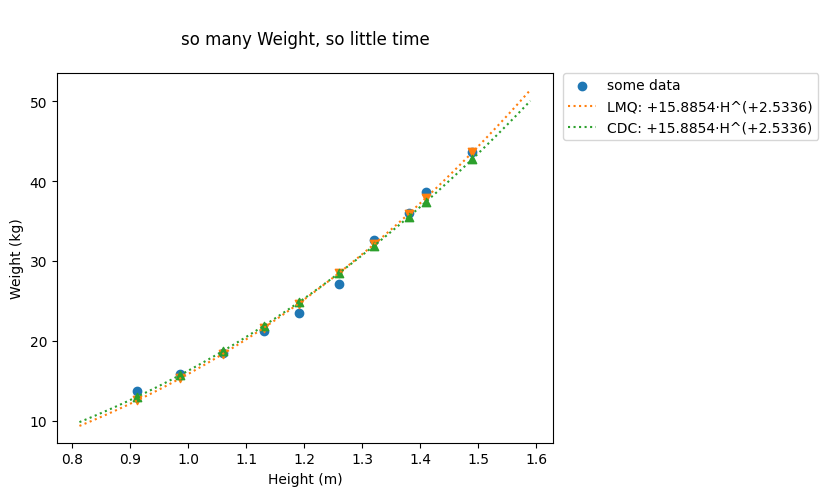

In [ ]:
# q6

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

def main():
  # answer
  cs_cdc = np.array([16.3,2.42])
  cs_ans = np.array([15.9,2.53])

  # model, descriptors
  f = lambda cs,x: cs[0]*pow(x,cs[1]) # f(x) ~ w(h)
  sf = lambda cs: f"{cs[0]:+.4f}·H^({cs[1]:+.4f})"
  sf_y_axis = "Weight"
  sf_y_units = sf_y_axis + " (kg)"
  sf_x_axis = "Height"
  sf_x_units = sf_x_axis + " (m)"

  # data, offsets
  xs_offset = 0
  h = 0.01
  xs = np.array([0.912,0.986,1.06,1.13,1.19,1.26,1.32,1.38,1.41,1.49]) # height
  ys = np.array([13.7,15.9,18.5,21.3,23.5,27.2,32.7,36,38.6,43.7]) # weight
  # data, interval w higher resolution to display functions smoothly
  xs_dis = np.linspace(min(xs)-0.1,max(xs)+0.1,int((max(xs)-min(xs)+0.2)/h)+1)

  # r(x), dr(x)
  r = lambda cs,x,y: f(cs,x) - y
  dr1 = lambda cs,x: pow(x,cs[1])
  dr2 = lambda cs,x: cs[0]*pow(x,cs[1])

  # parms, run-time
  eps = 1e-5
  imax = 10 # lol, not even this
  cs_old = cs_cdc.copy()
  cs_new = cs_old.copy()

  n_eqns = len(ys)
  n_vars = len(cs_old)
  a = np.zeros((n_eqns,n_vars))
  b = np.zeros((n_eqns))
  for k in range(imax):
    for i in range(n_eqns):
      # build a = DF
      a[i,0] = dr1(cs_old,xs[i])
      a[i,1] = dr2(cs_old,xs[i])
      # build b = r = f - y
      b[i] = r(cs_old,xs[i],ys[i])

    # least squares
    if True:
      if True: # lmq w varying λ (internal to method)
        #eps = 1e-5 # default is 1e-08
        cs_lmq = (sp.optimize.least_squares(fun=r,x0=cs_old,method='lm',args=[xs,ys])).x
        print(f"\ncoeffs, nonlinear, lmq: [c1,c2] → y(x) = {sf(cs_lmq)}\n")
        ys_lmq = f(cs_lmq,xs_dis) # nonlinearized model over interval
        yi_lmq = f(cs_lmq,xs) # nonlinearized model at data x[i]
        delta = cs_lmq - cs_old # for show
        k = imax+1 # ends loop; iteration happens within method
      else:
        # short way: numpy, λ = 0 = gauss-newton ~ fail for this problem
        soln = np.linalg.lstsq(a,-b,rcond=None)
        delta = soln[0]
    else:
      # levenberg-marquardt w constant λ
      λ = 1.1
      ata = a.T @ a + λ*np.diagonal(a.T @ a)
      atb = a.T @ (-b)
      delta = np.linalg.solve(ata,atb)

    cs_new = cs_old + delta
    cs_old = cs_new.copy()
    error = np.linalg.norm(delta)
    print(f"levenberg-marquardt step {k}/{imax}: [{delta[0]:.4f},{delta[1]:.4f},{delta[1]:.4f}] w error = {error:.4f}")
    if (error < eps) or (k>imax): # hack for break with numpy method
      break

  ri_lsq = r(cs_new,xs,ys)
  yi_lsq = f(cs_new,xs)
  ys_lsq = f(cs_new,xs_dis)
  yi_cdc = f(cs_cdc,xs)
  ys_cdc = f(cs_cdc,xs_dis)

  # revert offset # here in case plot via pandas
  xs = xs + xs_offset
  xs_dis = xs_dis + xs_offset

  if True:
    # pandas dataframe # only for 4 data points so "xs"
    ps = np.full((xs.size,2+2*2),np.nan) # cols = t,T,(y,err)x2
    ps[:,0] = xs
    ps[:,1] = ys
    ps[:,2] = yi_lsq
    ps[:,3] = ps[:,1] - ps[:,2]
    ps[:,4] = yi_cdc
    ps[:,5] = ps[:,1] - ps[:,4]
    sCol = [sf_x_axis,sf_y_axis,"model","error","CDC","CDC,err"]
    df = pd.DataFrame(data=ps,columns=sCol) # populate dataframe
    df["error"] = df["error"].apply("{:.4f}".format)
    df["CDC,err"] = df["CDC,err"].apply("{:.4f}".format)
    df[sf_x_axis] = df[sf_x_axis].apply("{:.4f}".format)
    print() # spacer
    display(df)

  if True:
    # plot, data
    plt.scatter(xs,ys,c="C0",marker="o",label="some data")
    plt.scatter(xs,yi_lsq,c="C1",marker="v")
    plt.plot(xs_dis,ys_lsq,c="C1",linestyle=":",label="LMQ: " + sf(cs_new))
    plt.scatter(xs,yi_cdc,c="C2",marker="^")
    plt.plot(xs_dis,ys_cdc,c="C2",linestyle=":",label="CDC: " + sf(cs_new))

    # plot, style
    plt.title("\nso many " + sf_y_axis + ", so little time\n")
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    plt.xlabel(sf_x_units)
    plt.ylabel(sf_y_units)

    # plot, display
    plt.show()

if __name__ == "__main__":
  main()


### q7 (5 pts <font color=orange>EXTRA CREDIT</font>) a wee proof.

$Q$ is an orthogonal $m\times m$ matrix and $x$ is an $m$-dimensional vector. prove $||Qx||_2 = ||x||_2$.
</br>


##### answer


$||Qx||_2^2 = (Qx)^TQx = x^TQ^TQx = x^Tx = ||x||_2^2$.
</br>


### q8 (5 pts <font color=orange>EXTRA CREDIT</font>) another wee proof.

$x$ and $w$ are vectors of the same euclidean length -- ie, $||x||_2 = ||w||_2$. prove $w - x$ and $w + x$ are perpendicular.
</br>


##### answer


$(w-x)^T(w+x) = w^Tw - x^Tw + w^Tx - x^Tx = ||w||^2 - ||x||^2 = 0$.
</br>
